In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from mpl_toolkits.mplot3d import Axes3D
from vega_datasets import data
import io
from sklearn.cluster import KMeans
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from datetime import datetime
from datetime import date

ModuleNotFoundError: No module named 'vega_datasets'

In [8]:
data_raw = pd.read_csv('marketing_campaign.csv', sep = '\t', header = 0)
data_raw

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

# Limpeza e gráficos iniciais



VERIFICAR SE ID SAO UNICOS

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month

Target
Need to perform clustering to summarize customer segments.

In [9]:
#qual o nome das colunas?
data_raw.keys()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
#estimando dimensao dos dados
data_raw.shape

(2240, 29)

In [13]:
len(pd.unique(data_raw['ID']))

2240

In [14]:
#verificando integridade dos dados:
#faltam dados?
data_raw.isna().sum() 
#faltam 24 entradas em income

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [15]:
# os dados ausentes representam quandos porcento do total?
data_raw.isna().sum().sum()/data_raw.shape[0]

0.010714285714285714

Pouco mais de 1% dos dados estao danificados. Poderiamamos facilmente eliminar essas entradas sem nenhum prejuizo estatistico.

Continuando a limpeza, vamos buscar  outliers:


In [16]:
#primeiramente remover os 24 dados sem 'income'.
data_droped_nan=data_raw.dropna().copy()#criando data frame sem os nan's
#é importante usar copy para desassociar modificações nos dataframes
data_droped_nan

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2216 rows x 29 columns]

In [17]:
data_droped_nan.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [18]:
data_droped_nan[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2216.000000  2216.000000      2216.000000      2216.000000   
mean    305.091606    26.356047       166.995939        37.637635   
std     337.327920    39.793917       224.283273        54.752082   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     174.500000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       232.250000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  
count       2216.000000   2216.000000  
mean          27.028881     43.965253  
std           41.072046     51.815414  
min            0.000000      0.000000  
25%            1.000000      9.000000  
50%            8.000000     24.500000  
75%           33.000000     56.000000  
max          262.000000    321.000000

Text(0.5, 1.0, 'Year_Birth')

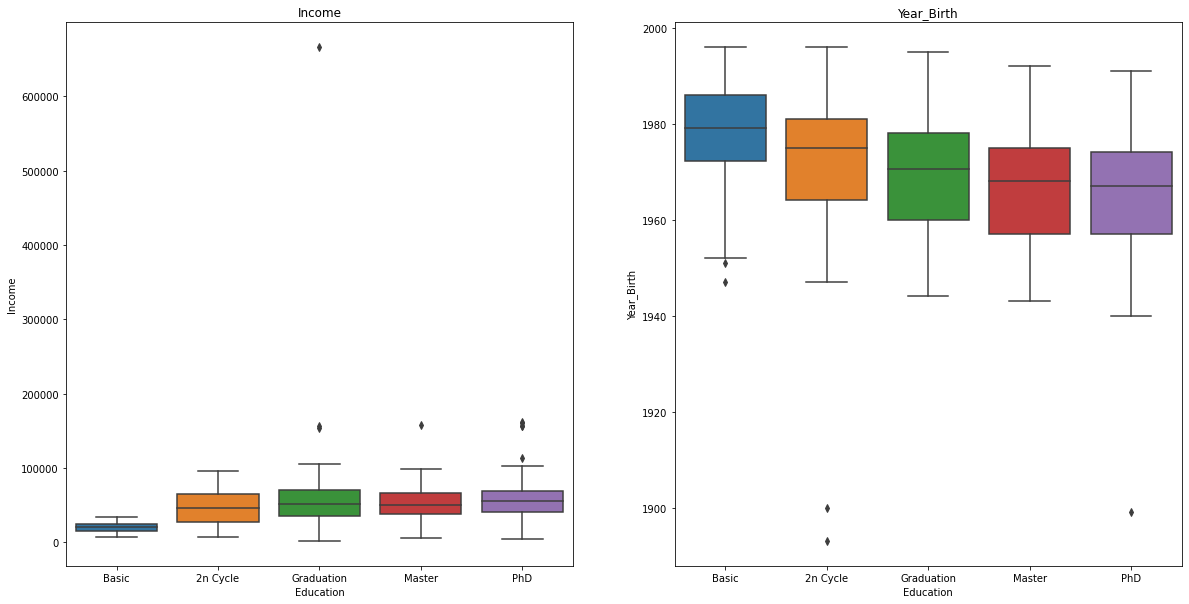

In [20]:
fig, axes = plt.subplots(1,2, figsize=(20, 10), sharey=False)
# Income
sns.boxplot(ax=axes[0],x="Education", y="Income",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=data_droped_nan)
axes[0].set_title('Income')

# Year_Birth
sns.boxplot(ax=axes[1],x="Education", y="Year_Birth",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=data_droped_nan)
axes[1].set_title('Year_Birth')

Text(0.5, 1.0, 'MntGoldProds')

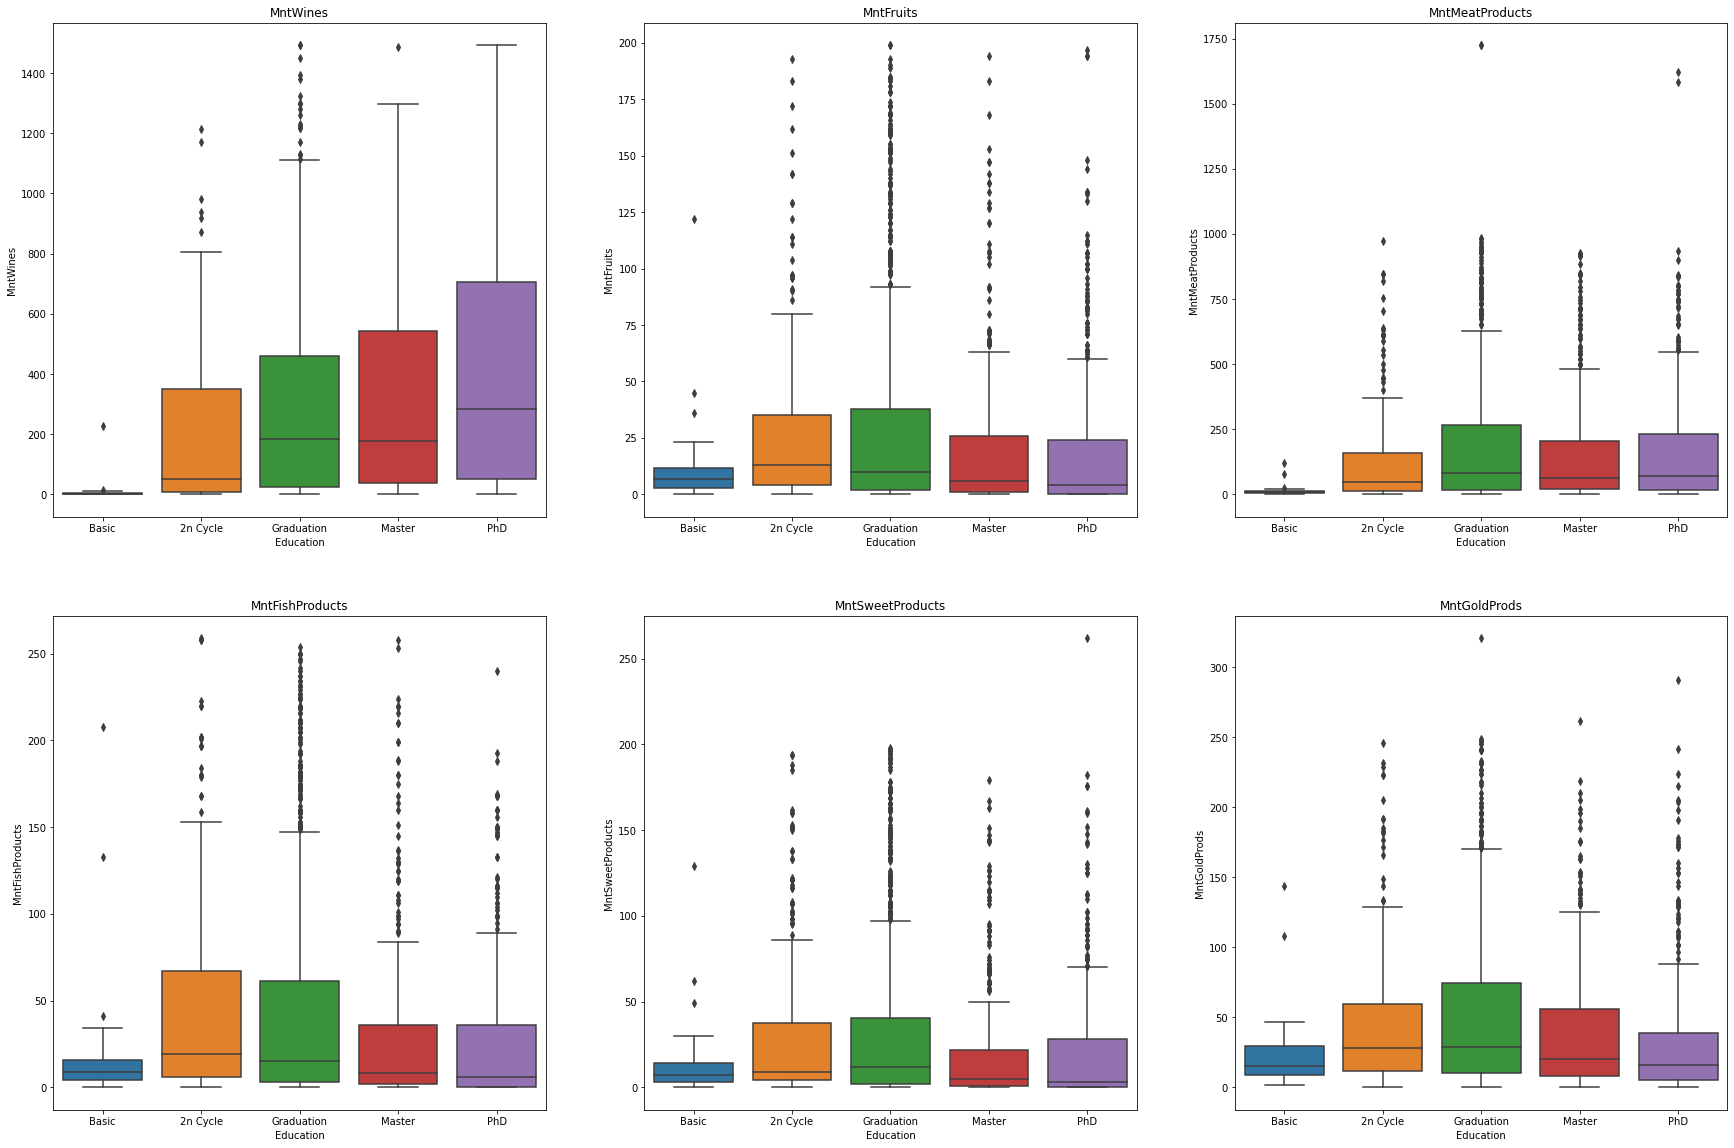

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(30, 20), sharey=False)

# Income
sns.boxplot(ax=axes[0,0],x="Education", y="MntWines",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=data_droped_nan)
axes[0,0].set_title('MntWines')

# Year_Birth
sns.boxplot(ax=axes[0,1],x="Education", y="MntFruits",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=data_droped_nan)
axes[0,1].set_title('MntFruits')

# MntWines                
sns.boxplot(ax=axes[0,2],x="Education", y="MntMeatProducts",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=data_droped_nan)
axes[0,2].set_title('MntMeatProducts')

# MntFishProducts
sns.boxplot(ax=axes[1,0],x="Education", y="MntFishProducts",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=data_droped_nan)
axes[1,0].set_title('MntFishProducts')

# MntSweetProducts
sns.boxplot(ax=axes[1,1],x="Education", y="MntSweetProducts",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=data_droped_nan)
axes[1,1].set_title('MntSweetProducts')

# MntGoldProds                
sns.boxplot(ax=axes[1,2],x="Education", y="MntGoldProds",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=data_droped_nan)
axes[1,2].set_title('MntGoldProds')

Removendo outliers usando quantiles:

In [22]:
#determinando os quantiles maximos e minimos:
max_quantile=data_droped_nan.quantile(0.995).copy()
min_quantile=data_droped_nan.quantile(0.005).copy()
max_quantile

ID                      11113.850
Year_Birth               1993.000
Income                 102145.750
Kidhome                     2.000
Teenhome                    2.000
Recency                    99.000
MntWines                 1376.750
MntFruits                 184.925
MntMeatProducts           945.550
MntFishProducts           241.850
MntSweetProducts          190.850
MntGoldProds              241.000
NumDealsPurchases          12.000
NumWebPurchases            11.000
NumCatalogPurchases        11.000
NumStorePurchases          13.000
NumWebVisitsMonth           9.925
AcceptedCmp3                1.000
AcceptedCmp4                1.000
AcceptedCmp5                1.000
AcceptedCmp1                1.000
AcceptedCmp2                1.000
Complain                    1.000
Z_CostContact               3.000
Z_Revenue                  11.000
Response                    1.000
Name: 0.995, dtype: float64

Onde vamos 'cortar' os outliers?

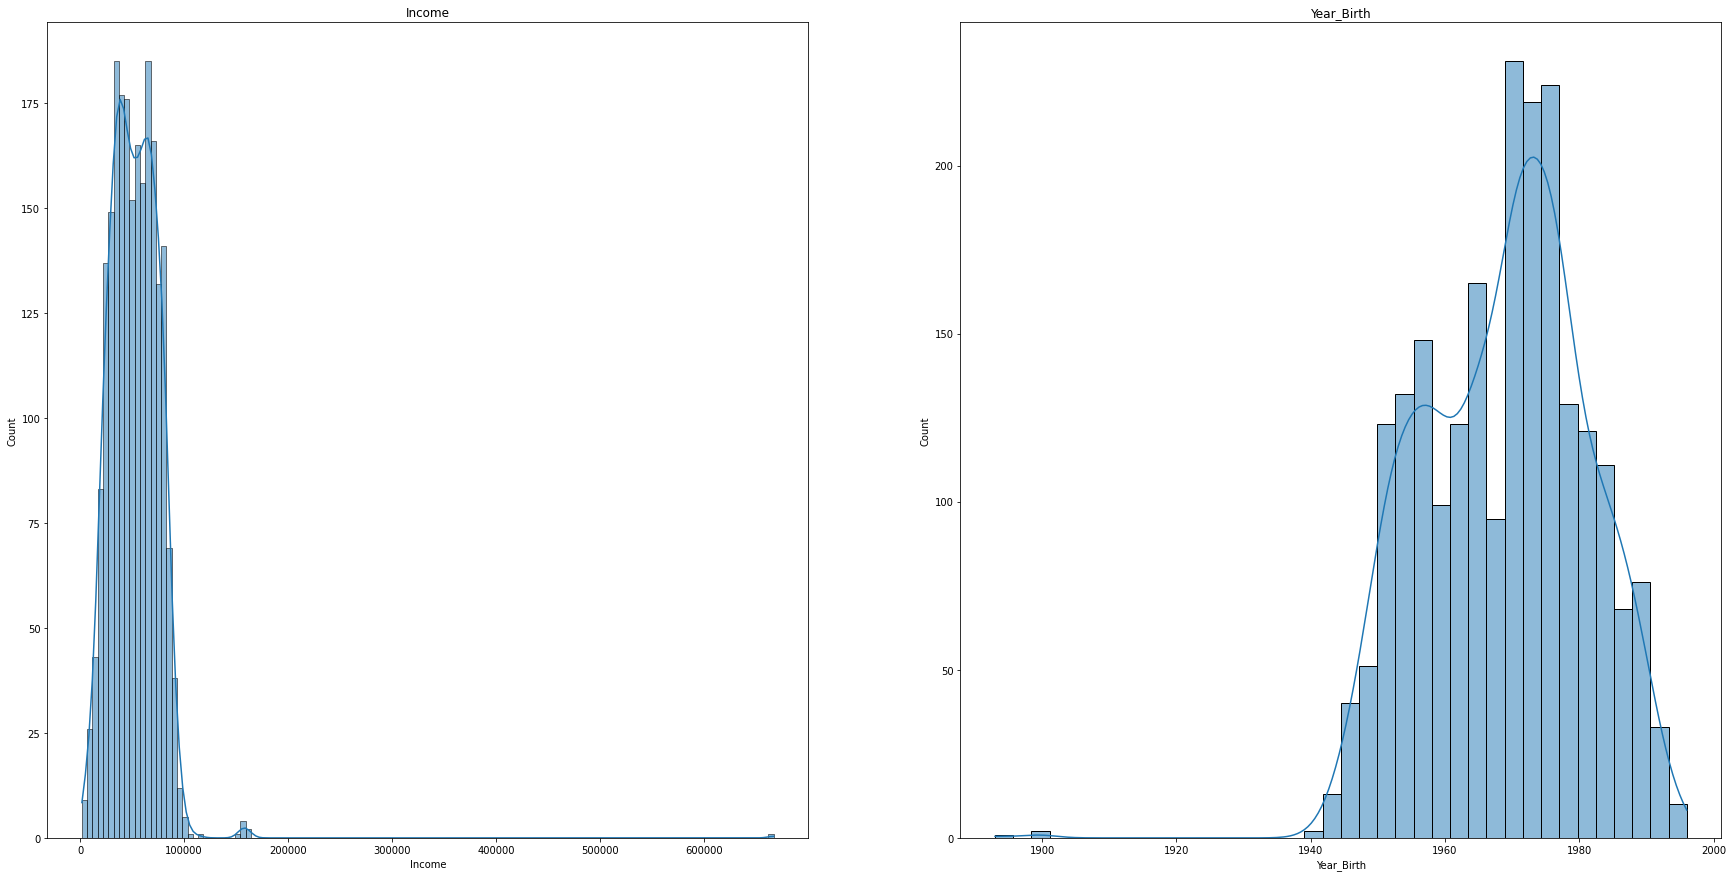

In [23]:
#examples
fig, axes = plt.subplots(1, 2, figsize=(30, 15), sharey=False)
# Income
sns.histplot(ax=axes[0],x="Income", data=data_droped_nan, kde=True)
axes[0].set_title('Income')

# Year_Birth
sns.histplot(ax=axes[1],x="Year_Birth", data=data_droped_nan, kde=True)
axes[1].set_title('Year_Birth')
plt.show()

Para usar query nas variaveis categorias, vamos trocalas por numeros.

vamos usar 'queries' para filtrar os dados usando somente aqueles que nao apresentaram problemas.

In [24]:
#limpando income 0,005%<= income <=0.995%
cond_0=f'{min_quantile["Income"]}<=Income<={max_quantile["Income"]}'
#limpando Year_Birth 0,005%< year_birth
cond_1=f'{min_quantile["Year_Birth"]}<=Year_Birth'
#lipando MntSweetProducts 0,005%<= MntSweetProducts
cond_2=f'MntSweetProducts<={max_quantile["MntSweetProducts"]}'
#lipando MntMeatProducts 0,005%<= MntSweetProducts          
cond_3=f'MntMeatProducts<={max_quantile["MntMeatProducts"]}'

aux=data_droped_nan
for i in [cond_0,cond_1,cond_2,cond_3]:     
    aux=aux.query(i)
    data_clean=aux

#data_clean=data_droped_nan.query(cond_0).query(cond_1).query(cond_2).query(cond_3)
data_clean.reset_index(inplace=True)
data_clean['Income'].max()

101970.0

In [25]:
#alteramos somente xx% dos dados
print(f'Alteramos apenas {round((1-(data_clean.shape[0]/data_raw.shape[0]))*100,2)}% dos dados.')

Alteramos apenas 3.39% dos dados.


Repetindo os Box_plots:

Text(0.5, 1.0, 'Year_Birth')

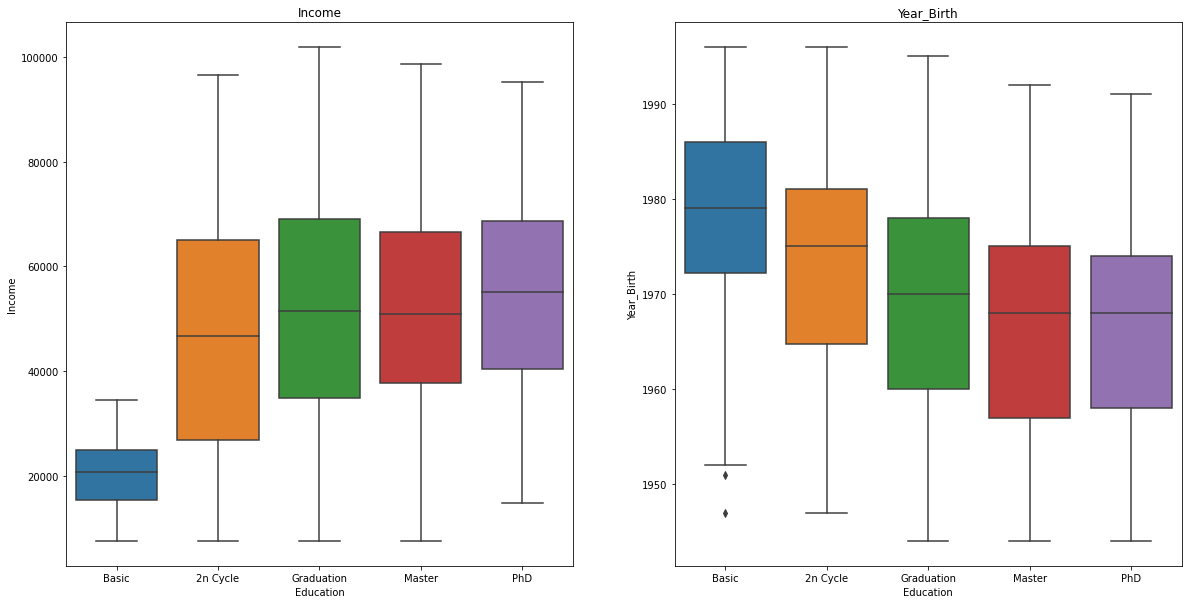

In [26]:
fig, axes = plt.subplots(1,2, figsize=(20, 10), sharey=False)
# Income
sns.boxplot(ax=axes[0],x="Education", y="Income",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=data_clean)
axes[0].set_title('Income')

# Year_Birth
sns.boxplot(ax=axes[1],x="Education", y="Year_Birth",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=data_clean)
axes[1].set_title('Year_Birth')

Text(0.5, 1.0, 'MntGoldProds')

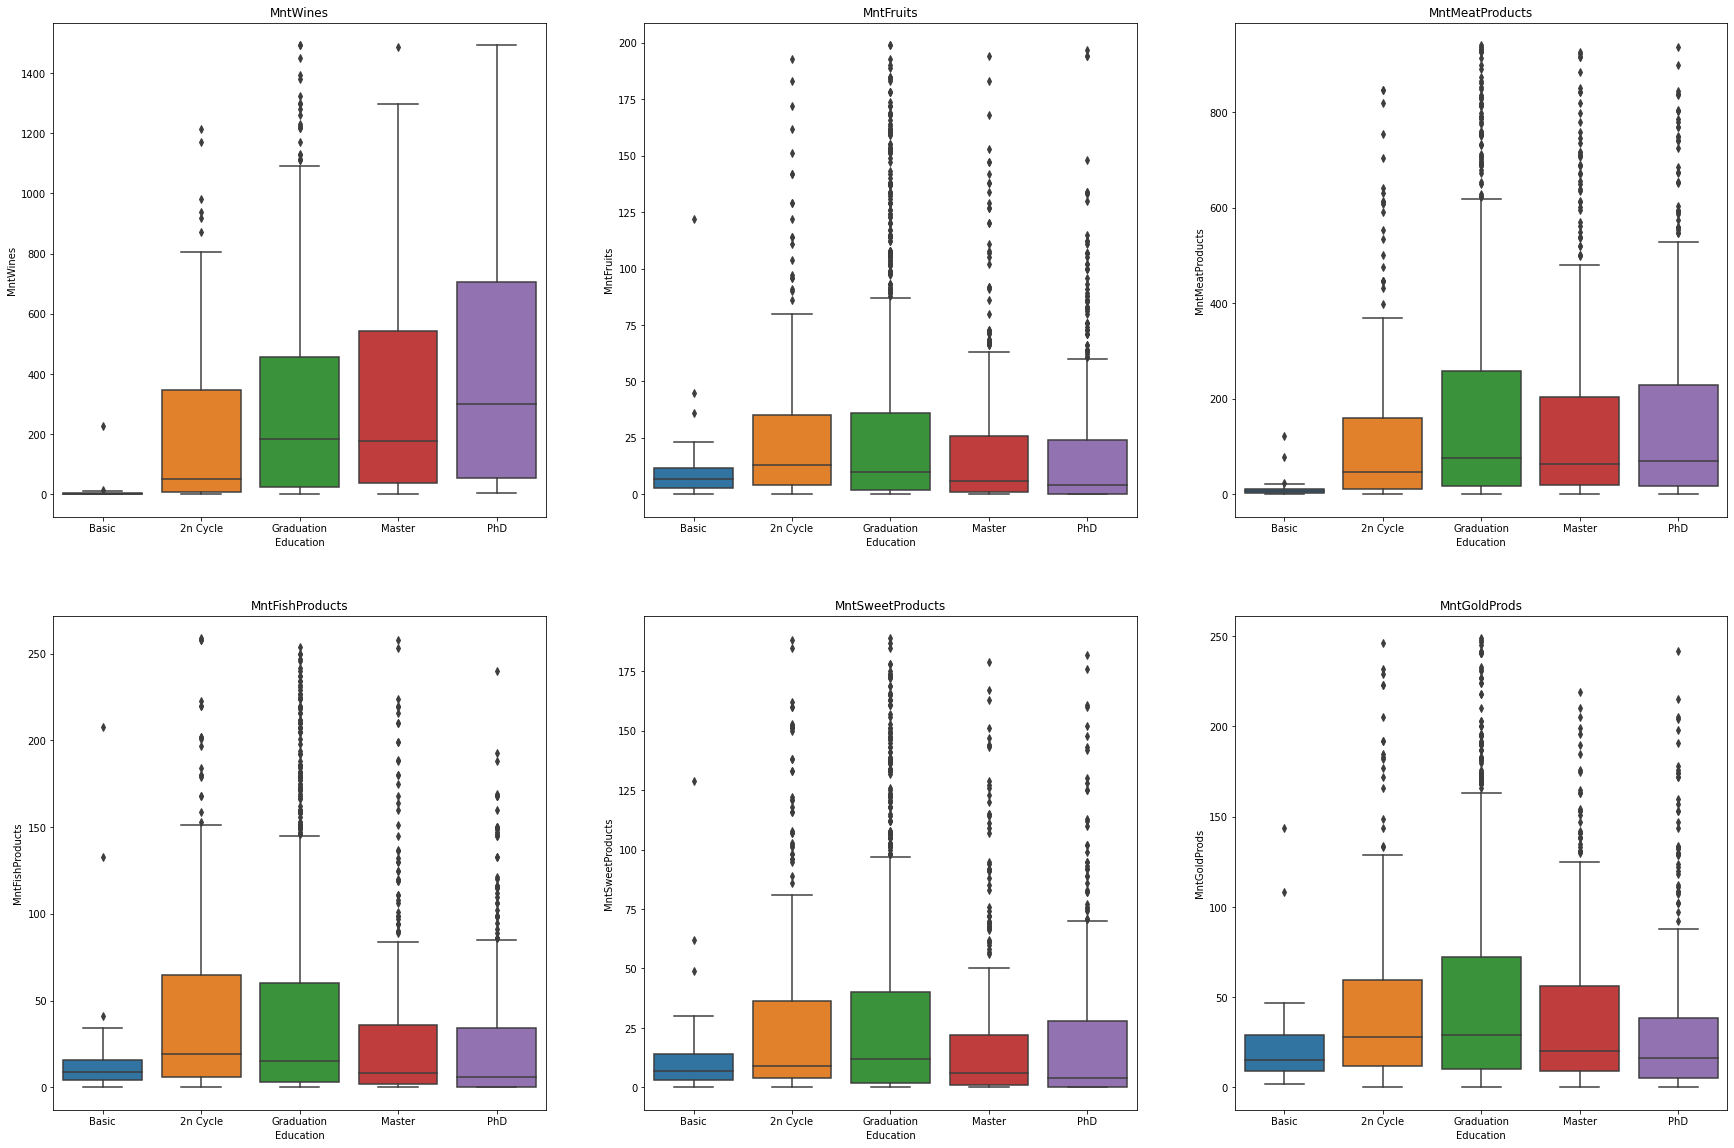

In [27]:
source=data_clean
fig, axes = plt.subplots(2, 3, figsize=(30, 20), sharey=False)

# Income
sns.boxplot(ax=axes[0,0],x="Education", y="MntWines",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=source)
axes[0,0].set_title('MntWines')

# Year_Birth
sns.boxplot(ax=axes[0,1],x="Education", y="MntFruits",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=source)
axes[0,1].set_title('MntFruits')

# MntWines                
sns.boxplot(ax=axes[0,2],x="Education", y="MntMeatProducts",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=source)
axes[0,2].set_title('MntMeatProducts')

# MntFishProducts
sns.boxplot(ax=axes[1,0],x="Education", y="MntFishProducts",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=source)
axes[1,0].set_title('MntFishProducts')

# MntSweetProducts
sns.boxplot(ax=axes[1,1],x="Education", y="MntSweetProducts",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=source)
axes[1,1].set_title('MntSweetProducts')

# MntGoldProds                
sns.boxplot(ax=axes[1,2],x="Education", y="MntGoldProds",order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], data=source)
axes[1,2].set_title('MntGoldProds')

Quem ganha mais, gasta mais com tudo. Correlaçao consumo X income

In [28]:
#tratando as variaveis categorias vamos reordenar 'Education'
#data_droped_nan['Education'].dtype# retorna dtype('O')
#para visualizar as categorias '.cat.categories'
education_order=['Basic','2n Cycle', 'Graduation', 'Master', 'PhD']
data_education_cat_col=data_clean['Education'].astype('category').cat.reorder_categories(education_order)
#foi preciso reordenar as categorias colocando basic antes
data_education_cat_col.cat.categories#checando a ordem




Index(['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], dtype='object')

In [29]:
#trocando a coluna education original pela coluna nova com as categorias
data_clean['Education']=data_education_cat_col.cat.codes#troca as categorias por seus codigos numericos
data_education_cat_col.cat.categories#checando a ordem


Index(['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], dtype='object')

In [30]:
data_clean['Education']

0       2
1       2
2       2
3       2
4       4
       ..
2159    2
2160    4
2161    2
2162    3
2163    4
Name: Education, Length: 2164, dtype: int8

Vamos precisar de outra metrica para entender o padrao de consumo. Mas antes verifcamos a alta correlação entre 'salario medio' e education

In [33]:
 view=data_clean.groupby(['Education']).mean().reset_index()
 view[['Education','Income']].corr()[['Education']] #essa conta foi possivel porque 'education' foi substituido por numeros (.cat.codes)

Education
Education   1.000000
Income      0.830829

<AxesSubplot:xlabel='Education', ylabel='Income'>

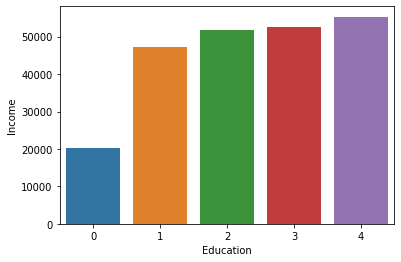

In [34]:
sns.barplot(data=view[['Education','Income']], x="Education", y="Income")


CRIANDO A COLUNA: 'GASTO RELATIVO' COM REPEITO A CADA TIPO DE PRODUTO.

In [35]:
produtos=['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
for x in produtos:
    data_clean['relative_'+x]=data_clean[x]/(data_clean[produtos].sum(axis=1))

a importancia de criar uma nova metrica

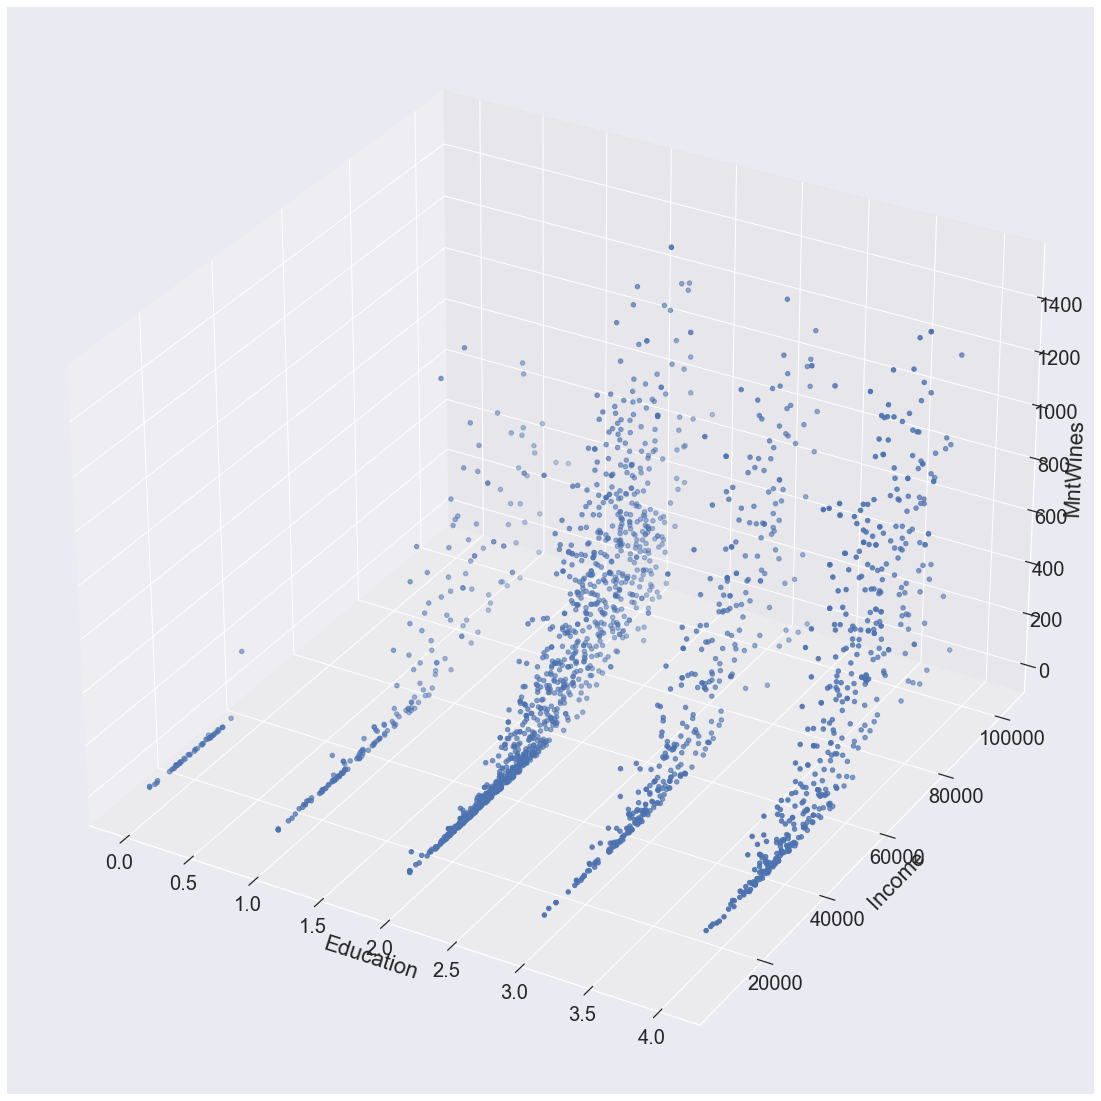

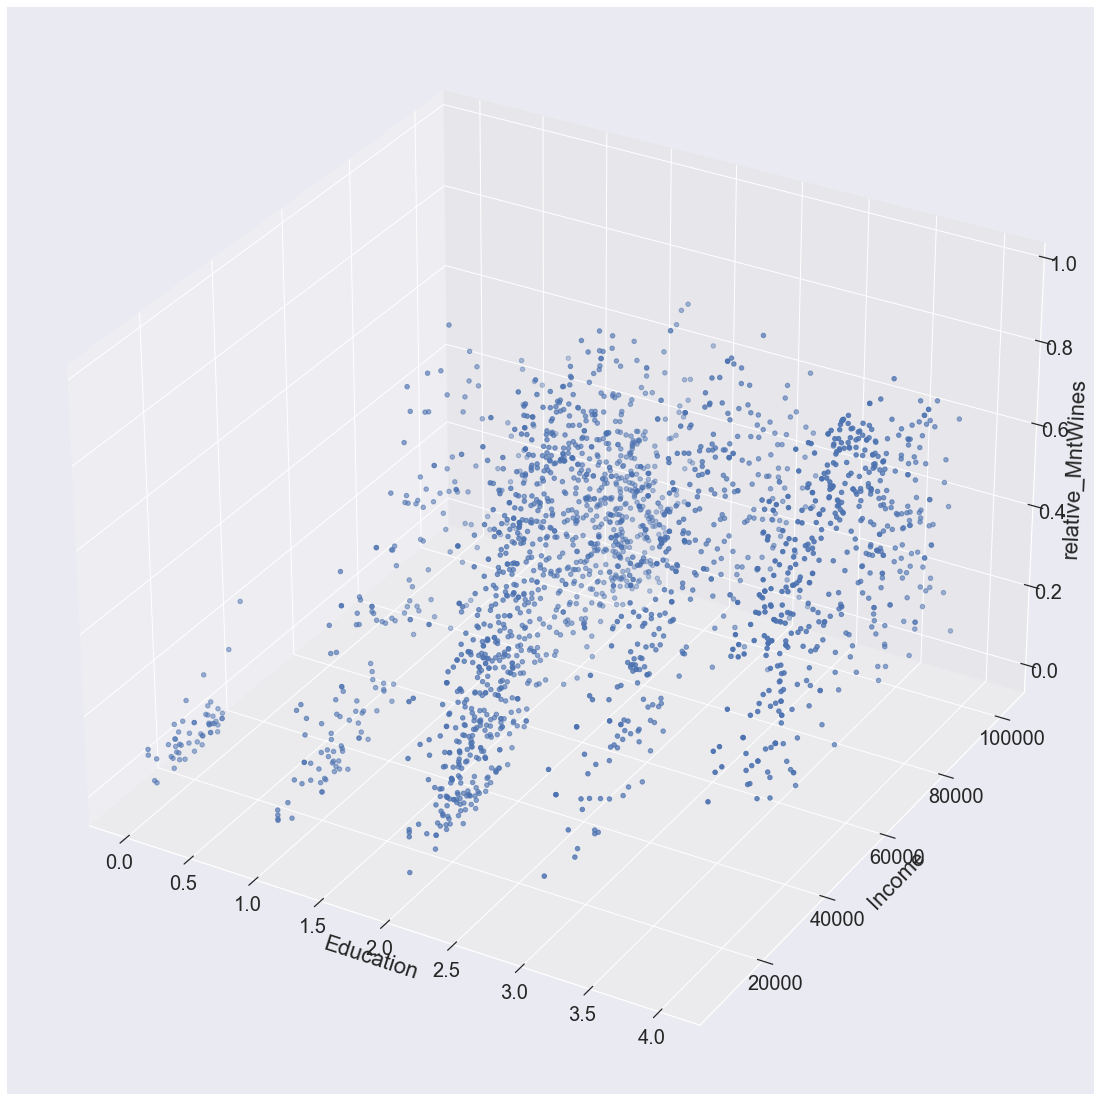

In [36]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection = '3d')

x = data_clean['Education']
y = data_clean['Income']
z = data_clean['MntWines']

ax.set_xlabel("Education")
ax.set_ylabel("Income")
ax.set_zlabel("MntWines")

ax.scatter(x, y, z)

ax.set_xlabel('Education', fontsize=22)
ax.set_ylabel('Income', fontsize=22)
ax.set_zlabel('MntWines', fontsize=22)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)


fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection = '3d')

x = data_clean['Education']
y = data_clean['Income']
z = data_clean['relative_MntWines']

ax.set_xlabel("Education")
ax.set_ylabel("Income")
ax.set_zlabel("relative_MntWines")

ax.scatter(x, y, z)

ax.set_xlabel('Education', fontsize=22)
ax.set_ylabel('Income', fontsize=22)
ax.set_zlabel('relative_MntWines', fontsize=22)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

plt.show()

<AxesSubplot:xlabel='Education', ylabel='Income'>

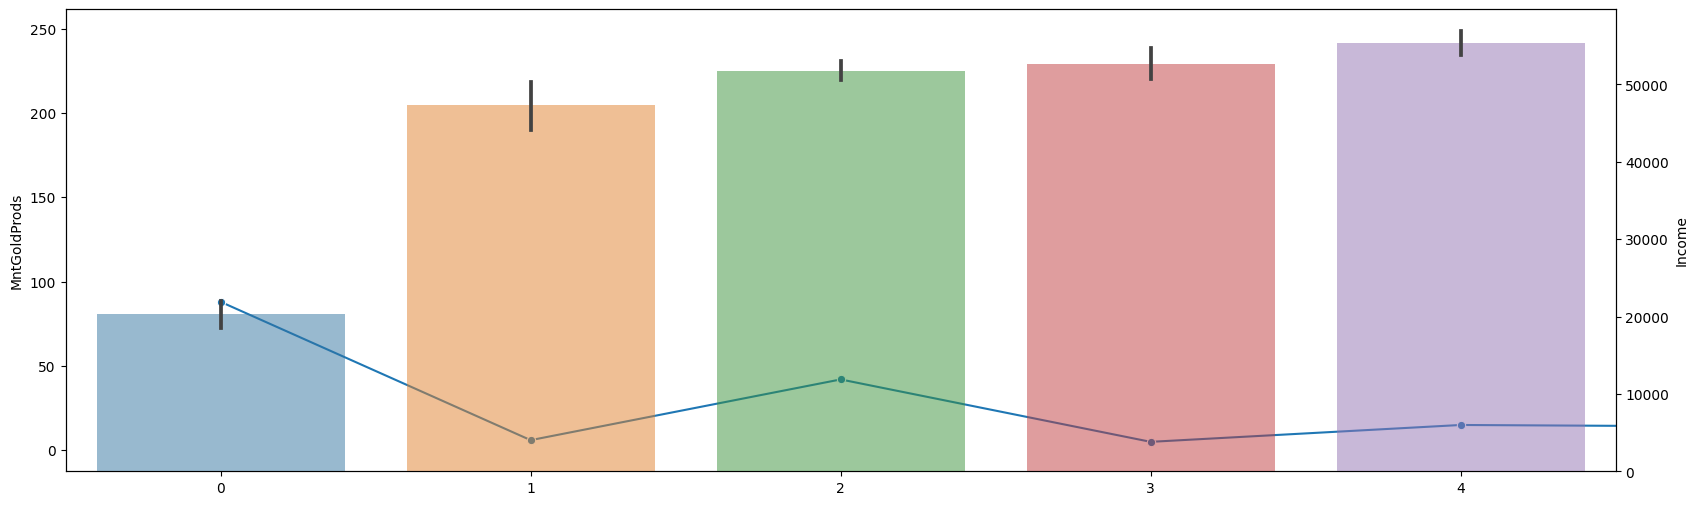

In [37]:
import matplotlib

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(20,6))

sns.lineplot(data = data_clean['MntGoldProds'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = data_clean, x='Education', y='Income', alpha=0.5, ax=ax2)

Usando estes dados para buscar relação entre education e gasto relativo com cada produto

CRIANDO UMA FUNÇÃO PARA FAZER OS SCATTER PLOTS COM CENTRIODE

In [38]:
def scatter_centroid(x,cent_color='red',ax=None):
    #recebe um dataframe com duas colunas x e y. retorna as coordenadas do centroid 
     centroids_x=pd.DataFrame(x.mean()).iloc[0]
     centroids_y = pd.DataFrame(x.mean()).iloc[1]
     name_graf_x,name_graf_y=x.columns[0],x.columns[1]
     
     graf_centroid_1=plt.scatter(centroids_x,centroids_y, s=25,linewidths = 5, zorder = 10, c=[cent_color],alpha=0.75)
     graf_1=plt.scatter(x=pd.Series(x[name_graf_x]),y=pd.Series(x[name_graf_y]),s=2)
     plt.xlabel(name_graf_x)
     plt.ylabel(name_graf_y)
     grafico=plt.show()

     return grafico

BUSCANDO CORRELACAO ENTRE O CONSUMO DE PRODUTOS USANDO A COLUNA 'RELATIVE_****'

In [40]:
data_clean.columns

Index(['index', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'relative_MntWines', 'relative_MntFruits', 'relative_MntMeatProducts',
       'relative_MntFishProducts', 'relative_MntSweetProducts',
       'relative_MntGoldProds'],
      dtype='object')

buscando correlacao entre o gasto relativo com vinho e o gasto relativo com outros produtos (A MELHOR RELAÇÃO POSSIVEL NESTE CASO É 0.5 POR 0.5)

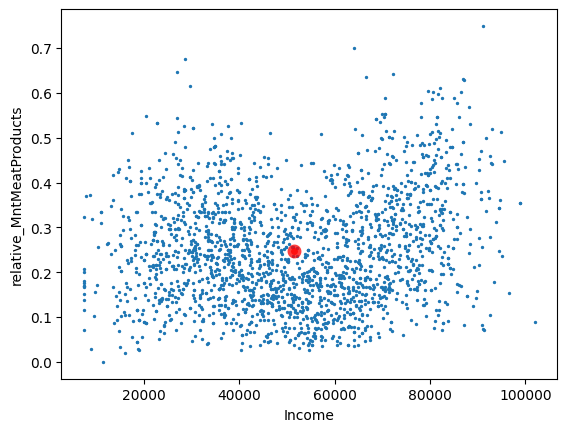

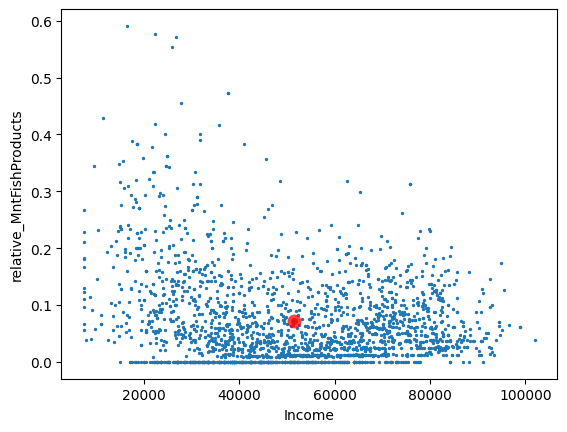

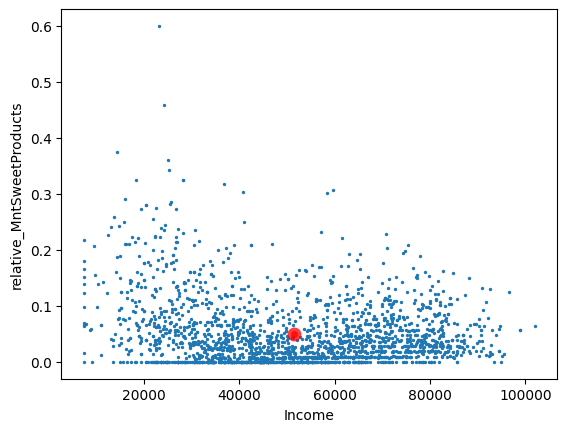

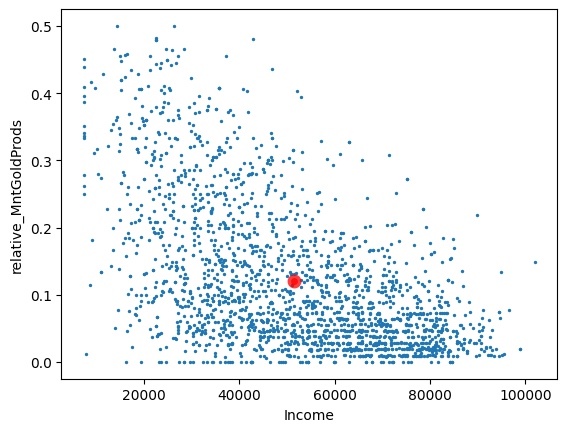

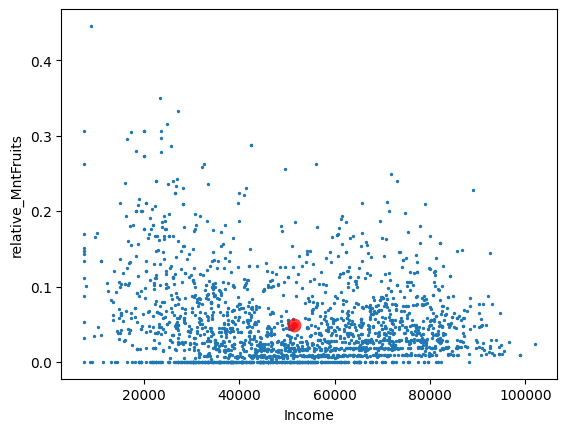

In [41]:
scatter_centroid(data_clean[['Income','relative_MntMeatProducts']]);
scatter_centroid(data_clean[['Income','relative_MntFishProducts']]);
scatter_centroid(data_clean[['Income','relative_MntSweetProducts']]);
scatter_centroid(data_clean[['Income','relative_MntGoldProds']]);
scatter_centroid(data_clean[['Income','relative_MntFruits']]);
#fazer para outros pares

CRIANDO CLASSES PARA AGRUPAR OS DADOS POR 'FAIXA SALARAIAL' E/OU 'FAIXA ETARIA'

primeiro criando a funcao que retorna a faixa salarial

In [42]:
alt.Chart(source).mark_rect().encode(
    alt.X('Education:Q', bin=alt.Bin(maxbins=5)),
    alt.Y('Income:Q', bin=alt.Bin(maxbins=17)),
    alt.Color('mean(relative_MntWines):Q', scale=alt.Scale(scheme='viridis'))
)

alt.Chart(...)

criando uma nova coluna com faturamento percentual em vinho, gold, fish, meat...

In [43]:
produtos=['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
for i in produtos:
    data_clean[f'perc_{i}']=data_clean[i]/data_clean[i].sum()

In [44]:
data_clean["Education"]=data_clean["Education"].astype('float64')

In [45]:
data_clean["Education"]=data_clean["Education"]+0.5

In [46]:
source=data_clean

In [47]:
brush = alt.selection(type='interval')
points =alt.Chart(source).mark_rect().encode(
    alt.X('Education:Q', bin=alt.Bin(maxbins=5)),
    alt.Y('Income:Q', bin=alt.Bin(maxbins=17)),
    alt.Color('sum(perc_MntWines):Q', scale=alt.Scale(scheme='yellowgreenblue'))
).add_selection(
    brush
)

bars = alt.vconcat(alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('count(ID):Q',scale=alt.Scale(domain=(0, 2164)))),
alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('sum(perc_MntWines):Q',scale=alt.Scale(domain=(0, 1)))),
alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('sum(perc_MntMeatProducts):Q',scale=alt.Scale(domain=(0, 1)))),
alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('sum(perc_MntGoldProds):Q',scale=alt.Scale(domain=(0, 1)))),
alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('sum(perc_MntFishProducts):Q',scale=alt.Scale(domain=(0, 1)))),
alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('sum(perc_MntSweetProducts):Q',scale=alt.Scale(domain=(0, 1)))),
alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('sum(perc_MntFruits):Q',scale=alt.Scale(domain=(0, 1))))).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

porcentagem de ganho total por cada protudo

In [48]:
data_clean[produtos].sum()/data_clean[produtos].sum().sum()

MntWines            0.509586
MntFruits           0.043557
MntMeatProducts     0.268571
MntFishProducts     0.061823
MntSweetProducts    0.043635
MntGoldProds        0.072827
dtype: float64

In [49]:
brush = alt.selection(type='interval')
selection = alt.selection_multi(fields=['Education', 'Income'])
map =alt.Chart(source).mark_circle().encode(
    alt.X('Education:Q', bin=alt.Bin(maxbins=5)),
    alt.Y('Income:Q', bin=alt.Bin(maxbins=17)),
    alt.Color('count(ID):Q', scale=alt.Scale(scheme='yellowgreenblue')),
    size='count()',
    tooltip='count(ID):N'
).add_selection(
    brush
)

bars = alt.vconcat(alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('mean(relative_MntWines):Q',scale=alt.Scale(domain=(0, 1))),
    tooltip='mean(relative_MntWines):N'),
alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('mean(relative_MntMeatProducts):Q',scale=alt.Scale(domain=(0, 1))),
    tooltip='mean(relative_MntMeatProducts):N'),
alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('mean(relative_MntGoldProds):Q',scale=alt.Scale(domain=(0, 1))),
    tooltip='mean(relative_MntGoldProds):N'),
alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('mean(relative_MntFishProducts):Q',scale=alt.Scale(domain=(0, 1))),
    tooltip='mean(relative_MntFishProducts):N'),
alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('mean(relavite_MntSweetProducts):Q',scale=alt.Scale(domain=(0, 1))),
    tooltip='mean(relavite_MntSweetProducts):N'),
alt.Chart(source).mark_bar().encode(
    #y='perc_MntWines:N',
    #color='perc_MntWines:N',
    alt.X('mean(relative_MntFruits):Q',scale=alt.Scale(domain=(0, 1))),
    tooltip='mean(relative_MntFruits):N')).transform_filter(
    brush
).add_selection(
    selection
)

map & bars

alt.VConcatChart(...)

# Venda de produtos por loja

In [50]:
data_clean

index     ID  Year_Birth  Education Marital_Status   Income  Kidhome  \
0         0   5524        1957        2.5         Single  58138.0        0   
1         1   2174        1954        2.5         Single  46344.0        1   
2         2   4141        1965        2.5       Together  71613.0        0   
3         3   6182        1984        2.5       Together  26646.0        1   
4         4   5324        1981        4.5        Married  58293.0        1   
...     ...    ...         ...        ...            ...      ...      ...   
2159   2235  10870        1967        2.5        Married  61223.0        0   
2160   2236   4001        1946        4.5       Together  64014.0        2   
2161   2237   7270        1981        2.5       Divorced  56981.0        0   
2162   2238   8235        1956        3.5       Together  69245.0        0   
2163   2239   9405        1954        4.5        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  ...  relative_MntMeatProducts  \
0            0  04-09-2012       58  ...                  0.337662   
1            1  08-03-2014       38  ...                  0.222222   
2            0  21-08-2013       26  ...                  0.163660   
3            0  10-02-2014       26  ...                  0.377358   
4            0  19-01-2014       94  ...                  0.279621   
...        ...         ...      ...  ...                       ...   
2159         1  13-06-2013       46  ...                  0.135720   
2160         1  10-06-2014       56  ...                  0.067568   
2161         0  25-01-2014       91  ...                  0.174859   
2162         1  24-01-2014        8  ...                  0.253855   
2163         1  15-10-2012       40  ...                  0.354651   

      relative_MntFishProducts  relative_MntSweetProducts  \
0                     0.106370                   0.054422   
1                     0.074074                   0.037037   
2                     0.143041                   0.027062   
3                     0.188679                   0.056604   
4                     0.109005                   0.063981   
...                        ...                        ...   
2159                  0.031320                   0.087994   
2160                  0.000000                   0.000000   
2161                  0.025786                   0.009670   
2162                  0.094899                   0.035587   
2163                  0.011628                   0.005814   

      relative_MntGoldProds  perc_MntWines  perc_MntFruits  \
0                  0.054422       0.000964        0.001563   
1                  0.222222       0.000017        0.000018   
2                  0.054124       0.000647        0.000870   
3                  0.094340       0.000017        0.000071   
4                  0.035545       0.000263        0.000764   
...                     ...            ...             ...   
2159               0.184191       0.001077        0.000764   
2160               0.018018       0.000617        0.000000   
2161               0.019339       0.001379        0.000853   
2162               0.072361       0.000650        0.000533   
2163               0.122093       0.000128        0.000053   

      perc_MntMeatProducts  perc_MntFishProducts  perc_MntSweetProducts  \
0                 0.001573              0.002153               0.001561   
1                 0.000017              0.000025               0.000018   
2                 0.000366              0.001389               0.000372   
3                 0.000058              0.000125               0.000053   
4                 0.000340              0.000576               0.000479   
...                    ...                   ...                    ...   
2159              0.000524              0.000526               0.002093   
2160              0.000086              0.000000               0.000000   
2161              0.000625              0.000401               0.000213   


In [51]:
produtos_loja = data_clean.loc[:,'MntWines':'perc_MntGoldProds']
produtos_loja

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2159       709         43              182               42               118   
2160       406          0               30                0                 0   
2161       908         48              217               32                12   
2162       428         30              214               80                30   
2163        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2159           247                  2                9                    3   
2160             8                  7                8                    2   
2161            24                  1                2                    3   
2162            61                  2                6                    5   
2163            21                  3                3                    1   

      NumStorePurchases  ...  relative_MntMeatProducts  \
0                     4  ...                  0.337662   
1                     2  ...                  0.222222   
2                    10  ...                  0.163660   
3                     4  ...                  0.377358   
4                     6  ...                  0.279621   
...                 ...  ...                       ...   
2159                  4  ...                  0.135720   
2160                  5  ...                  0.067568   
2161                 13  ...                  0.174859   
2162                 10  ...                  0.253855   
2163                  4  ...                  0.354651   

      relative_MntFishProducts  relative_MntSweetProducts  \
0                     0.106370                   0.054422   
1                     0.074074                   0.037037   
2                     0.143041                   0.027062   
3                     0.188679                   0.056604   
4                     0.109005                   0.063981   
...                        ...                        ...   
2159                  0.031320                   0.087994   
2160                  0.000000                   0.000000   
2161                  0.025786                   0.009670   
2162                  0.094899                   0.035587   
2163                  0.011628                   0.005814   

      relative_MntGoldProds  perc_MntWines  perc_MntFruits  \
0                  0.054422       0.000964        0.001563   
1                  0.222222       0.000017        0.000018   
2                  0.054124       0.000647        0.000870   
3                  0.094340       0.000017        0.000071   
4                  0.035545       0.000263        0.000764   
...                     ...            ...             ...   
2159               0.184191       0.001077        0.000764   
2160               0.018018       0.000617        0.000000   
2161               0.019339       0.001379        0.000853   
2162               0.072361       

In [52]:
classes = ['Rare Buyer', 'Buys Sometimes', 'Frequent Buyer', 'High Spender']

#classificando os compradores de cada produto em 4 classes
produtos_loja['class_wine'] = pd.cut(produtos_loja.relative_MntWines, [0,0.25,0.5,0.75,1], right = False, labels=classes)
produtos_loja['class_fruit'] = pd.cut(produtos_loja.relative_MntFruits, [0,0.25,0.5,0.75,1], right = False, labels=classes)
produtos_loja['class_meat'] = pd.cut(produtos_loja.relative_MntMeatProducts, [0,0.25,0.5,0.75,1], right = False, labels=classes)
produtos_loja['class_fish'] = pd.cut(produtos_loja.relative_MntFishProducts, [0,0.25,0.5,0.75,1], right = False, labels=classes)
produtos_loja['class_sweet'] = pd.cut(produtos_loja.relative_MntSweetProducts, [0,0.25,0.5,0.75,1], right = False, labels=classes)
produtos_loja['class_gold'] = pd.cut(produtos_loja.relative_MntGoldProds, [0,0.25,0.5,0.75,1], right = False, labels=classes)

produtos_loja

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2159       709         43              182               42               118   
2160       406          0               30                0                 0   
2161       908         48              217               32                12   
2162       428         30              214               80                30   
2163        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2159           247                  2                9                    3   
2160             8                  7                8                    2   
2161            24                  1                2                    3   
2162            61                  2                6                    5   
2163            21                  3                3                    1   

      NumStorePurchases  ...  perc_MntMeatProducts  perc_MntFishProducts  \
0                     4  ...              0.001573              0.002153   
1                     2  ...              0.000017              0.000025   
2                    10  ...              0.000366              0.001389   
3                     4  ...              0.000058              0.000125   
4                     6  ...              0.000340              0.000576   
...                 ...  ...                   ...                   ...   
2159                  4  ...              0.000524              0.000526   
2160                  5  ...              0.000086              0.000000   
2161                 13  ...              0.000625              0.000401   
2162                 10  ...              0.000617              0.001001   
2163                  4  ...              0.000176              0.000025   

      perc_MntSweetProducts  perc_MntGoldProds      class_wine  class_fruit  \
0                  0.001561           0.000935  Buys Sometimes   Rare Buyer   
1                  0.000018           0.000064  Buys Sometimes   Rare Buyer   
2                  0.000372           0.000446  Frequent Buyer   Rare Buyer   
3                  0.000053           0.000053      Rare Buyer   Rare Buyer   
4                  0.000479           0.000159  Buys Sometimes   Rare Buyer   
...                     ...                ...             ...          ...   
2159               0.002093           0.002624  Frequent Buyer   Rare Buyer   
2160               0.000000           0.000085    High Spender   Rare Buyer   
2161               0.000213           0.000255  Frequent Buyer   Rare Buyer   
2162               0.000532           0.000648  Frequent Buyer   Rare Buyer   
2163               0.000018           0.000223  Buys Sometimes   Rare Buyer   

          class_meat  class_fish  class_sweet  class_gold  
0     Buys Sometimes  Rare Buyer   Rare Buyer  Rare Buyer  
1         Rare Buyer  Rare Buyer   Rare Buyer  Rare Buyer  
2         Rare Buyer  Rare Buyer   Rare Bu

In [53]:
wine_group = produtos_loja.groupby(by = 'class_wine', axis=0).sum()
wine_group = wine_group.reset_index()

In [54]:
wine_group

class_wine  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0      Rare Buyer     18774       9149            40029            13216   
1  Buys Sometimes    209589      30792           184586            43424   
2  Frequent Buyer    301394      14790           105924            21382   
3    High Spender    128789       1559            16539             1873   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0              8080         15072                761             1036   
1             31331         40000               1672             3100   
2             15504         32458               1855             3332   
3              1475          6586                744             1332   

   NumCatalogPurchases  ...  relative_MntMeatProducts  \
0                  559  ...                116.538025   
1                 2375  ...                244.151446   
2                 2080  ...                147.241166   
3                  597  ...                 27.013979   

   relative_MntFishProducts  relative_MntSweetProducts  relative_MntGoldProds  \
0                 63.427991                  43.278625              95.348919   
1                 63.494441                  44.871993              92.634373   
2                 25.988600                  18.602582              60.735676   
3                  2.266677                   1.683892              11.391938   

   perc_MntWines  perc_MntFruits  perc_MntMeatProducts  perc_MntFishProducts  \
0       0.028508        0.162533              0.115331              0.165417   
1       0.318260        0.547024              0.531829              0.543513   
2       0.457666        0.262746              0.305188              0.267626   
3       0.195566        0.027696              0.047652              0.023443   

   perc_MntSweetProducts  perc_MntGoldProds  
0               0.143288           0.160143  
1               0.555613           0.425007  
2               0.274942           0.344872  
3               0.026157           0.069977  

[4 rows x 33 columns]

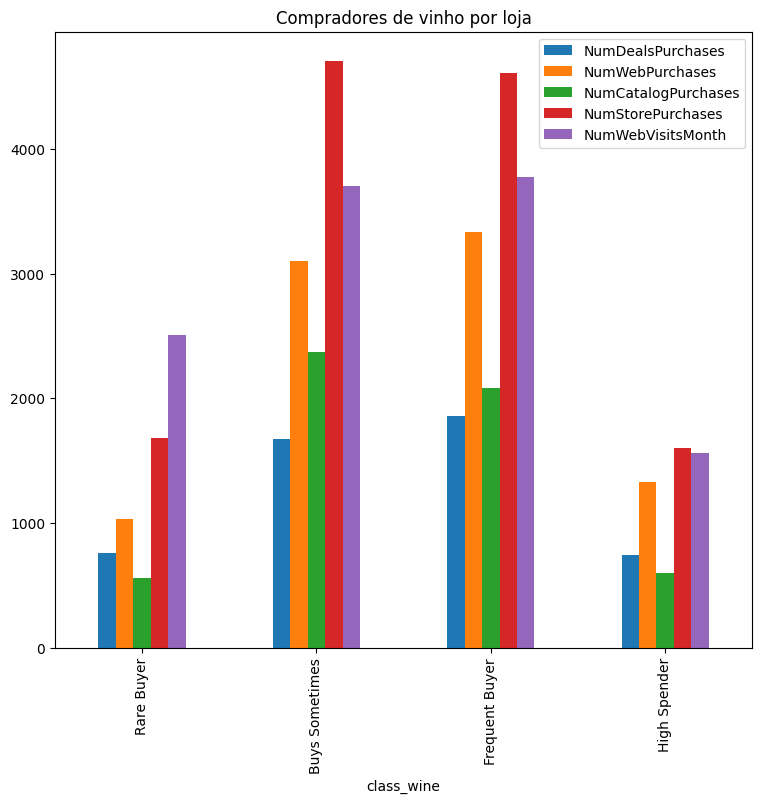

In [55]:
wine_group.plot(x="class_wine", y=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'], kind="bar",figsize=(9,8)).set(title = 'Compradores de vinho por loja')
plt.show()

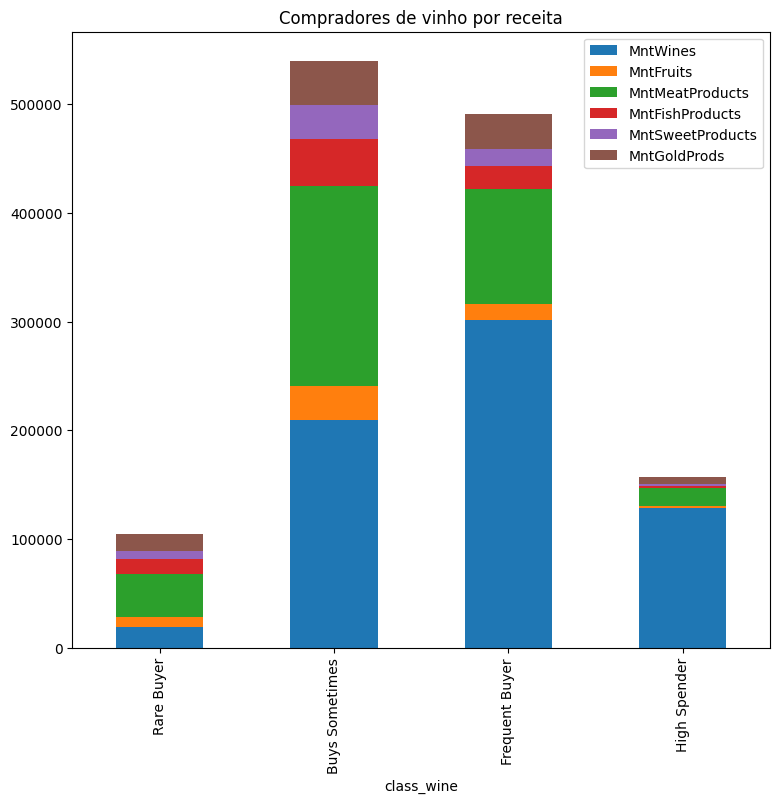

In [56]:
wine_group.plot(x="class_wine", y=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], kind="bar",figsize=(9,8), stacked = True).set(title = 'Compradores de vinho por receita')
plt.show()

In [57]:
meat_group = produtos_loja.groupby(by = 'class_meat', axis=0).sum()
meat_group = meat_group.reset_index()

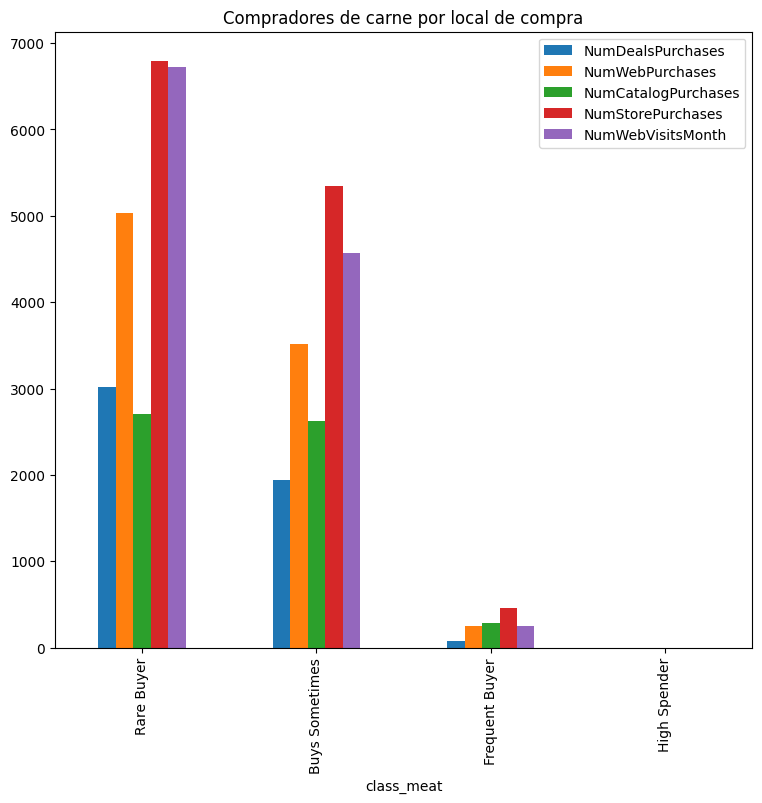

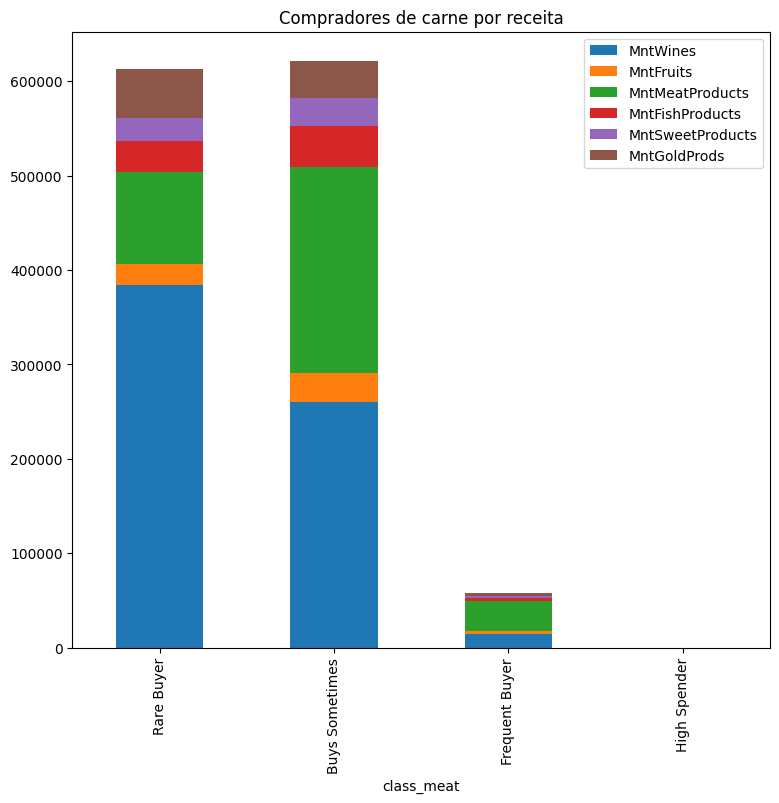

In [58]:
meat_group.plot(x="class_meat", y=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'], kind="bar",figsize=(9,8)).set(title = 'Compradores de carne por local de compra')
meat_group.plot(x="class_meat", y=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], kind="bar",figsize=(9,8), stacked = True).set(title = 'Compradores de carne por receita')
plt.show()

In [59]:
fruit_group = produtos_loja.groupby(by = 'class_fruit', axis=0).sum()
fruit_group = fruit_group.reset_index()

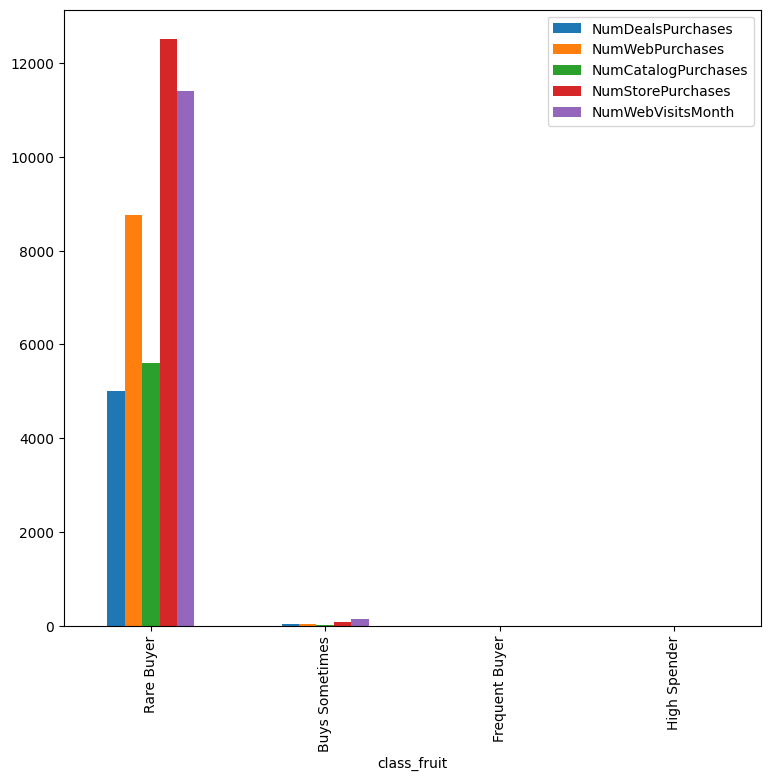

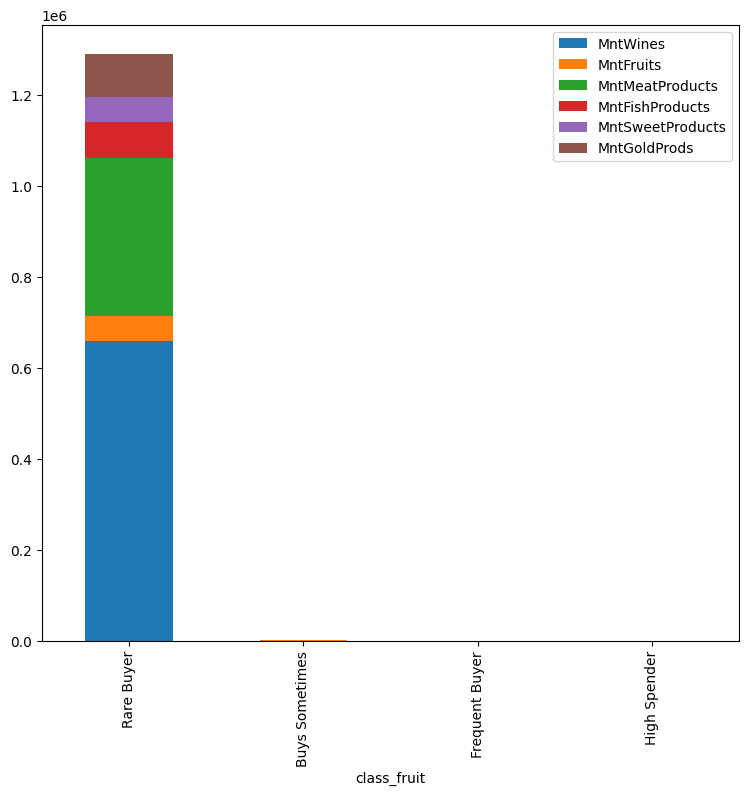

In [60]:
fruit_group.plot(x="class_fruit", y=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'], kind="bar",figsize=(9,8))
plt.show()
fruit_group.plot(x="class_fruit", y=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], kind="bar",figsize=(9,8), stacked = True)
plt.show()

In [61]:
fish_group = produtos_loja.groupby(by = 'class_fish', axis=0).sum()
fish_group = fish_group.reset_index()

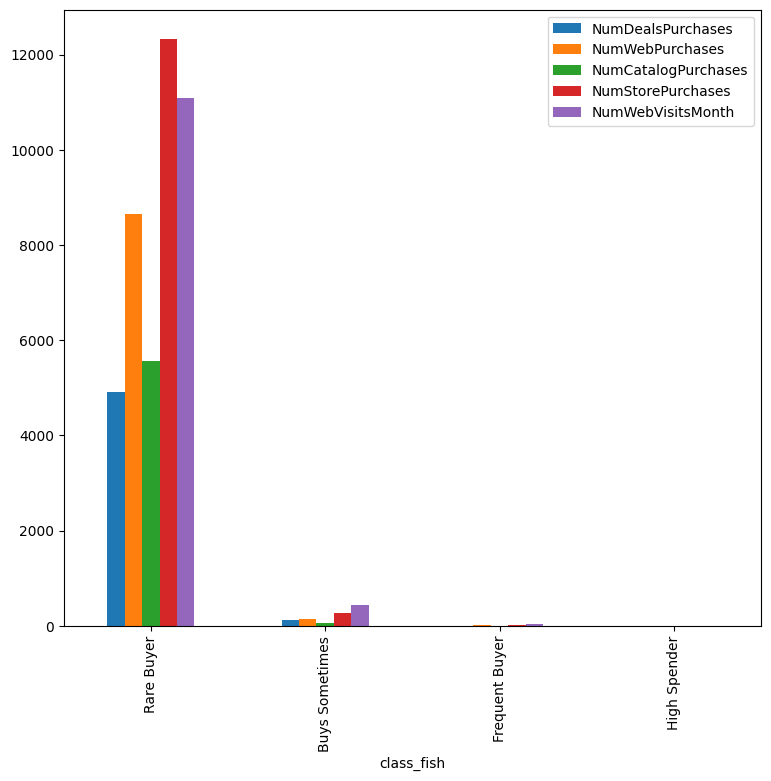

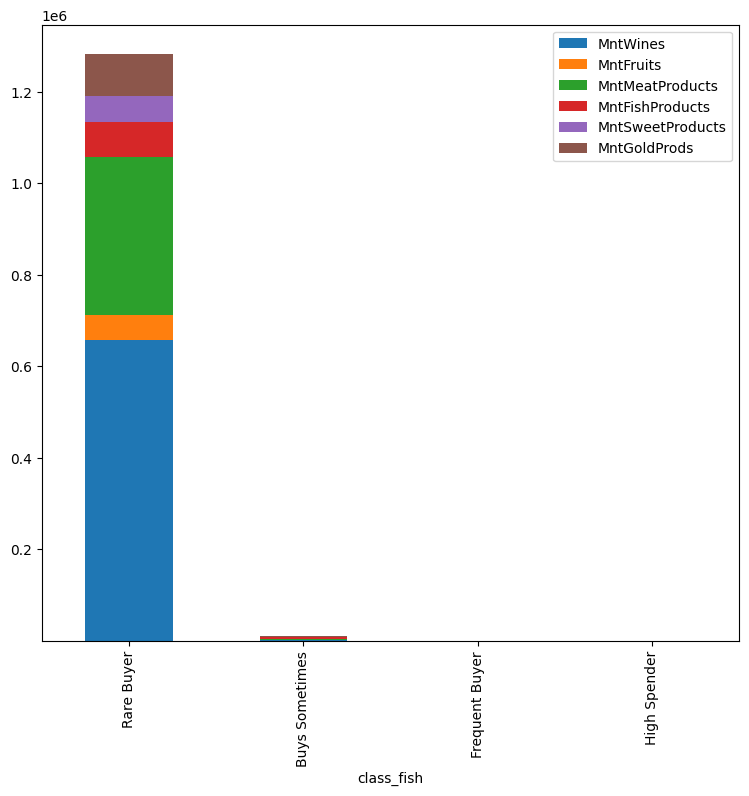

In [62]:
fish_group.plot(x="class_fish", y=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'], kind="bar",figsize=(9,8))
fish_group.plot(x="class_fish", y=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], kind="bar",figsize=(9,8), stacked = True)
plt.show()

In [63]:
sweet_group = produtos_loja.groupby(by = 'class_sweet', axis=0).sum()
sweet_group = sweet_group.reset_index()

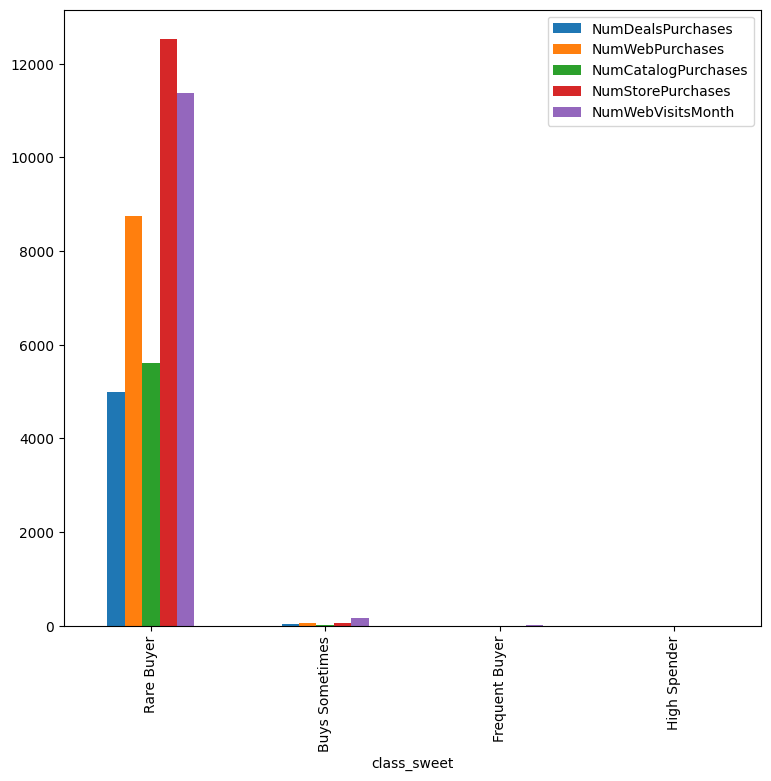

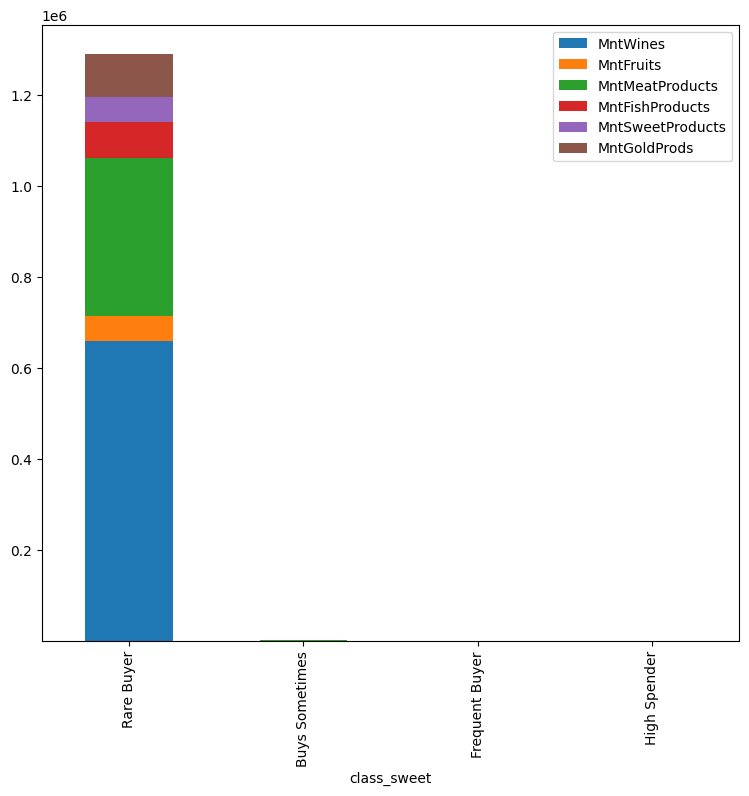

In [64]:
sweet_group.plot(x="class_sweet", y=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'], kind="bar",figsize=(9,8))
sweet_group.plot(x="class_sweet", y=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], kind="bar",figsize=(9,8), stacked = True)
plt.show()

In [65]:
gold_group = produtos_loja.groupby(by = 'class_gold', axis=0).sum()
gold_group = gold_group.reset_index()

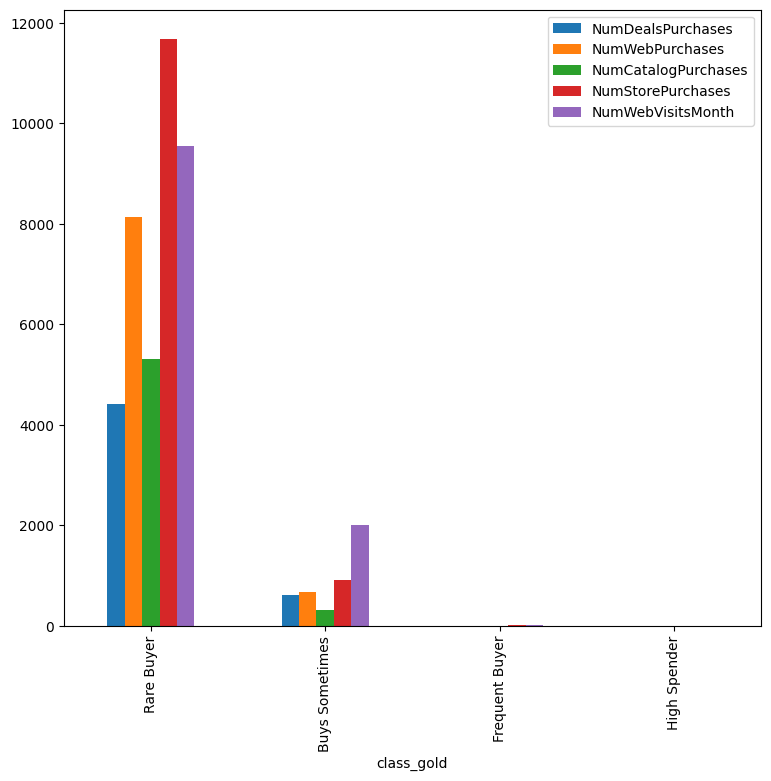

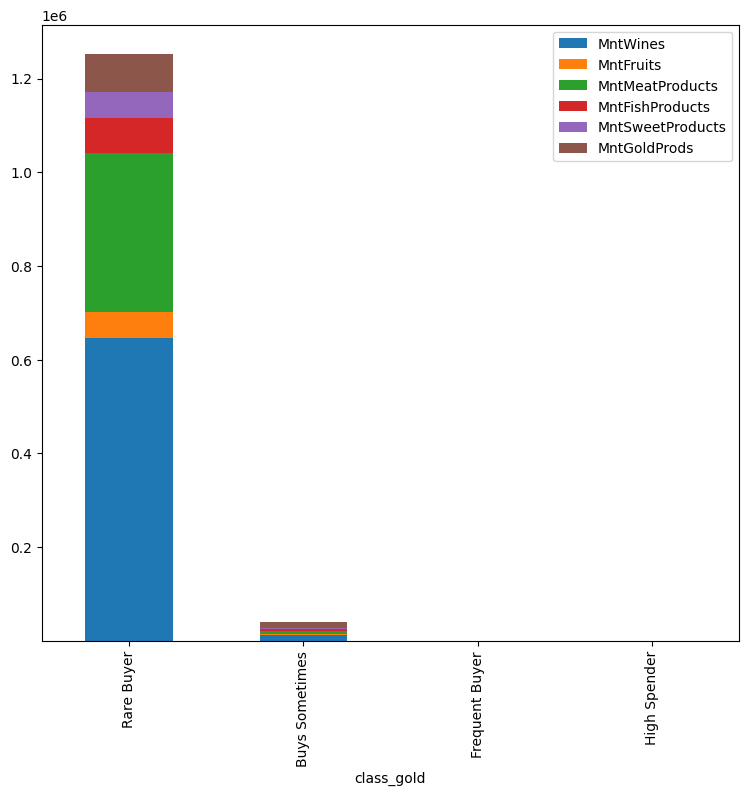

In [66]:
gold_group.plot(x="class_gold", y=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'], kind="bar",figsize=(9,8))
plt.show()
gold_group.plot(x="class_gold", y=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], kind="bar",figsize=(9,8), stacked = True)
plt.show()

# Clusterização

In [67]:
data_clean

index     ID  Year_Birth  Education Marital_Status   Income  Kidhome  \
0         0   5524        1957        2.5         Single  58138.0        0   
1         1   2174        1954        2.5         Single  46344.0        1   
2         2   4141        1965        2.5       Together  71613.0        0   
3         3   6182        1984        2.5       Together  26646.0        1   
4         4   5324        1981        4.5        Married  58293.0        1   
...     ...    ...         ...        ...            ...      ...      ...   
2159   2235  10870        1967        2.5        Married  61223.0        0   
2160   2236   4001        1946        4.5       Together  64014.0        2   
2161   2237   7270        1981        2.5       Divorced  56981.0        0   
2162   2238   8235        1956        3.5       Together  69245.0        0   
2163   2239   9405        1954        4.5        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  ...  relative_MntMeatProducts  \
0            0  04-09-2012       58  ...                  0.337662   
1            1  08-03-2014       38  ...                  0.222222   
2            0  21-08-2013       26  ...                  0.163660   
3            0  10-02-2014       26  ...                  0.377358   
4            0  19-01-2014       94  ...                  0.279621   
...        ...         ...      ...  ...                       ...   
2159         1  13-06-2013       46  ...                  0.135720   
2160         1  10-06-2014       56  ...                  0.067568   
2161         0  25-01-2014       91  ...                  0.174859   
2162         1  24-01-2014        8  ...                  0.253855   
2163         1  15-10-2012       40  ...                  0.354651   

      relative_MntFishProducts  relative_MntSweetProducts  \
0                     0.106370                   0.054422   
1                     0.074074                   0.037037   
2                     0.143041                   0.027062   
3                     0.188679                   0.056604   
4                     0.109005                   0.063981   
...                        ...                        ...   
2159                  0.031320                   0.087994   
2160                  0.000000                   0.000000   
2161                  0.025786                   0.009670   
2162                  0.094899                   0.035587   
2163                  0.011628                   0.005814   

      relative_MntGoldProds  perc_MntWines  perc_MntFruits  \
0                  0.054422       0.000964        0.001563   
1                  0.222222       0.000017        0.000018   
2                  0.054124       0.000647        0.000870   
3                  0.094340       0.000017        0.000071   
4                  0.035545       0.000263        0.000764   
...                     ...            ...             ...   
2159               0.184191       0.001077        0.000764   
2160               0.018018       0.000617        0.000000   
2161               0.019339       0.001379        0.000853   
2162               0.072361       0.000650        0.000533   
2163               0.122093       0.000128        0.000053   

      perc_MntMeatProducts  perc_MntFishProducts  perc_MntSweetProducts  \
0                 0.001573              0.002153               0.001561   
1                 0.000017              0.000025               0.000018   
2                 0.000366              0.001389               0.000372   
3                 0.000058              0.000125               0.000053   
4                 0.000340              0.000576               0.000479   
...                    ...                   ...                    ...   
2159              0.000524              0.000526               0.002093   
2160              0.000086              0.000000               0.000000   
2161              0.000625              0.000401               0.000213   


In [68]:
data_clean['Total_Spend'] = data_clean['MntWines'] + data_clean['MntFruits'] + data_clean['MntMeatProducts'] + data_clean['MntFishProducts'] + data_clean['MntSweetProducts'] + data_clean['MntGoldProds']
data_clean['Age'] = date.today().year - data_clean['Year_Birth']
data_clean['Spending_Perc'] = (data_clean['Total_Spend']/data_clean['Income'])*100

data_clean['Dt_Customer'] = pd.to_datetime(data_clean['Dt_Customer'], format = '%d-%m-%Y')
data_clean['Seniority'] = datetime.now() - data_clean['Dt_Customer']
data_clean['Seniority (in days)'] = pd.to_numeric(data_clean['Seniority'].dt.days, downcast='integer')

data_clean

NameError: name 'date' is not defined

In [ ]:
df2D = data_clean[['Income','Spending_Perc']].values

df2D

In [ ]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(df2D)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Elbow at 3

model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(df2D)

In [ ]:
plt.figure(figsize = (20,10))

plt.scatter(df2D[y_clusters == 1,0],df2D[y_clusters == 1,1],s = 50, c = 'blue', label = "Less income - Less spending")
plt.scatter(df2D[y_clusters == 0,0],df2D[y_clusters == 0,1],s = 50, c = 'green', label = "medium income - medium spending")
plt.scatter(df2D[y_clusters == 2,0],df2D[y_clusters == 2,1],s = 50, c = 'black', label = "Hign income - high spending")
#plt.scatter(df2D[y_clusters == 3,0],df2D[y_clusters == 3,1],s = 50, c = 'red', label = "Less income - high spending")
#plt.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],s = 50, c = 'pink', label = "Less income and less spending")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Income -- >")
plt.ylabel("Spending % -- >")
plt.legend()
plt.show()

In [ ]:
# input matrix for segmentation
x = data_clean[['Age','Income','Spending_Perc']].values

x

In [ ]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [ ]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
#ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Income-->')
ax.set_zlabel('Spending-->')
ax.legend()
plt.show()

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'Income'),zaxis = dict(title  = 'Spending Percentage'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
# input matrix for segmentation
x2 = data_clean[['Seniority (in days)','Income','Spending_Perc']].values

x2

In [ ]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x2)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x2)

In [ ]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Seniority'),yaxis = dict(title  = 'Income'),zaxis = dict(title  = 'Spending Percentage'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x2[:, 0], y=x2[:, 1], z=x2[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()